In [40]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [222]:
raw_data = pd.read_excel('./Датасет.xlsx')

In [223]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 68 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ВБП (Прогрессирование болезни) (0-нет прогрессирвоания, 1 - есть прогрессирование)       1001 non-null   int64  
 1   КЗ (Контроль заболевания) (0-нет, 1 - есть)                                              1001 non-null   int64  
 2   Объективный ответ (0-нет, 1 - есть)                                                      1001 non-null   int64  
 3   Токсичность 3-4                                                                          1001 non-null   int64  
 4   Нозология (1- рак почки, 2 - меланома, 3 - рак легкого, 4 - рак ЖКТ,5- рак шейки матки)  1001 non-null   int64  
 5   возраст                                                       

In [224]:
raw_data.describe()

,"ВБП (Прогрессирование болезни) (0-нет прогрессирвоания, 1 - есть прогрессирование)","КЗ (Контроль заболевания) (0-нет, 1 - есть)","Объективный ответ (0-нет, 1 - есть)",Токсичность 3-4,"Нозология (1- рак почки, 2 - меланома, 3 - рак легкого, 4 - рак ЖКТ,5- рак шейки матки)",возраст,"Пол (1-м, 2 - ж)",ECOG,ПМЗО,Сопутствующие. Наличие,Гипертоническая болезнь(1),ИБС(2),ХОБЛ(3),Мерц аритмия(4),Эндокринопатии(5),СД(6),Ревматоидные заболевания(7),Гепатиты(8),Анемия до начала лечения(9),Гастроэнтериты(10),Болезни мочевыводящей системы(11),Варикозное расширение вен(12),Т стадия,N стадия,легкие,печень,кости,брюшная полость,ЛУ,надпочечники,плевра,почки,мягкие ткани,яичники,головной мозг,поджелудочная железа,молочная железа,Характер метастазирования,Стадия,Мутация гена BRAF,Индекс массы тела,Линия иммунотерапии,Токсичность 3-4.1,Медиана времени до ответа,Медиана длительности ответа,Медиана наилучшего ответа,Гемоглобин,Тромбоциты,Лимфоциты,Моноциты,ЛДГ,Альбумин,"Саркопения (0 - нет, 1 - да), критерии Prado (ж - <38,5, м- <52,4)","Саркопения 0 - нет, 1 - да (41 для ж, 43 для м ИМТ <25, 53 для м ИМТ >25)",Нейтрофильно-лимфоцитарное отношение,Тромбоцитарно-лимфоцитарное отношение,Лимфоцитарно-моноцитарное отношение
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.00000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,717.000000,717.000000,717.000000,722.000000,709.000000,242.000000,242.000000,80.000000,60.000000,312.000000,312.000000,242.000000,242.000000,242.000000
mean,0.306693,0.906094,0.400599,0.034965,2.410589,62.375624,1.414585,0.971029,1.909091,0.80020,1.568432,1.788212,1.938062,1.939061,1.944056,1.891109,1.978022,1.965035,1.966034,1.903097,1.969031,1.953047,2.773227,1.006993,0.338661,0.130869,0.143856,0.049950,0.418581,0.070929,0.041958,0.020979,0.054945,0.012987,0.046953,0.023976,0.001998,1.570430,2.932068,0.605395,26.573897,3.195804,0.034965,4.013694,15.388216,12.129957,129.396814,271.483780,1.985868,0.668347,287.903750,41.769500,0.660256,0.641026,1.877441,154.006677,3.644804
std,0.461351,0.509090,0.643708,0.183783,1.140284,12.044117,0.492897,0.536805,0.287623,0.40005,0.495543,0.408780,0.241164,0.239338,0.229929,0.311658,0.146685,0.183783,0.181232,0.295974,0.173320,0.211644,1.153916,1.202061,0.473491,0.337426,0.351119,0.217951,0.493573,0.256835,0.200594,0.143386,0.227987,0.113275,0.211644,0.153051,0.044677,0.686502,1.084150,0.852720,5.329280,7.241106,0.183783,2.833255,11.025278,10.704240,20.246661,102.901337,0.830647,1.016506,192.727875,6.656809,0.474383,0.480470,2.159044,91.449763,1.818993
min,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,14.700000,0.000000,0.000000,0.230000,0.000000,0.230000,2.500000,51.000000,0.430000,0.110000,21.000000,26.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,2.000000,56.000000,1.000000,1.000000,2.000000,1.00000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,22.900000,1.000000,0.000000,2.430000,7.100000,4.270000,117.000000,201.000000,1.412500,0.430000,181.250000,38.125000,0.000000,0.000000,0.000000,101.670507,2.371981
50%

In [225]:
# удаляем значения на основе порогового значения
threshold = 0.5 * len(raw_data)
df_predprocessed = raw_data.dropna(thresh=threshold, axis=1)
df_predprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 54 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ВБП (Прогрессирование болезни) (0-нет прогрессирвоания, 1 - есть прогрессирование)       1001 non-null   int64  
 1   КЗ (Контроль заболевания) (0-нет, 1 - есть)                                              1001 non-null   int64  
 2   Объективный ответ (0-нет, 1 - есть)                                                      1001 non-null   int64  
 3   Токсичность 3-4                                                                          1001 non-null   int64  
 4   Нозология (1- рак почки, 2 - меланома, 3 - рак легкого, 4 - рак ЖКТ,5- рак шейки матки)  1001 non-null   int64  
 5   возраст                                                       

In [226]:
df_predprocessed.columns

Index(['ВБП (Прогрессирование болезни) (0-нет прогрессирвоания, 1 - есть прогрессирование)',
       'КЗ (Контроль заболевания) (0-нет, 1 - есть)',
       'Объективный ответ (0-нет, 1 - есть)', 'Токсичность 3-4',
       'Нозология (1- рак почки, 2 - меланома, 3 - рак легкого, 4 - рак ЖКТ,5- рак шейки матки)',
       'возраст', 'Пол (1-м, 2 - ж)', 'ECOG', 'ПМЗО', 'Сопутствующие. Наличие',
       'Гипертоническая болезнь(1)', 'ИБС(2)', 'ХОБЛ(3)', 'Мерц аритмия(4)',
       'Эндокринопатии(5)', 'СД(6)', 'Ревматоидные заболевания(7)',
       'Гепатиты(8)', 'Анемия до начала лечения(9)', 'Гастроэнтериты(10)',
       'Болезни мочевыводящей системы(11)', 'Варикозное расширение вен(12)',
       'Т стадия', 'N стадия', 'легкие', 'печень', 'кости', 'брюшная полость',
       'ЛУ', 'надпочечники', 'плевра', 'почки', 'мягкие ткани', 'яичники',
       'головной мозг', 'поджелудочная железа', 'молочная железа',
       'Характер метастазирования', 'Стадия', 'Мутация гена BRAF',
       'Индекс массы тела

In [227]:
# Удаляем нечетко заданные признаки
columns_to_drop = ['Токсичность 3-4.1', 'Медиана времени до ответа', 'Медиана длительности ответа', 'Медиана наилучшего ответа', 'АЛТ', 'АСТ', 'Лейкоциты', 'Общий белок', 'Креатинин']
df_predprocessed = df_predprocessed.drop(columns=columns_to_drop)

# Преобразуем "Нозология" в One-Hot Encoding
df_cleaned = pd.get_dummies(df_predprocessed, columns=['Нозология (1- рак почки, 2 - меланома, 3 - рак легкого, 4 - рак ЖКТ,5- рак шейки матки)'], drop_first=True)


In [228]:
df_predprocessed.columns


Index(['ВБП (Прогрессирование болезни) (0-нет прогрессирвоания, 1 - есть прогрессирование)',
       'КЗ (Контроль заболевания) (0-нет, 1 - есть)',
       'Объективный ответ (0-нет, 1 - есть)', 'Токсичность 3-4',
       'Нозология (1- рак почки, 2 - меланома, 3 - рак легкого, 4 - рак ЖКТ,5- рак шейки матки)',
       'возраст', 'Пол (1-м, 2 - ж)', 'ECOG', 'ПМЗО', 'Сопутствующие. Наличие',
       'Гипертоническая болезнь(1)', 'ИБС(2)', 'ХОБЛ(3)', 'Мерц аритмия(4)',
       'Эндокринопатии(5)', 'СД(6)', 'Ревматоидные заболевания(7)',
       'Гепатиты(8)', 'Анемия до начала лечения(9)', 'Гастроэнтериты(10)',
       'Болезни мочевыводящей системы(11)', 'Варикозное расширение вен(12)',
       'Т стадия', 'N стадия', 'легкие', 'печень', 'кости', 'брюшная полость',
       'ЛУ', 'надпочечники', 'плевра', 'почки', 'мягкие ткани', 'яичники',
       'головной мозг', 'поджелудочная железа', 'молочная железа',
       'Характер метастазирования', 'Стадия', 'Мутация гена BRAF',
       'Индекс массы тела

In [243]:
# Переименуем колонки для удобства
df_cleaned = df_cleaned.rename(columns={
    'Нозология (1- рак почки, 2 - меланома, 3 - рак легкого, 4 - рак ЖКТ,5- рак шейки матки)_2': 'Меланома',
    'Нозология (1- рак почки, 2 - меланома, 3 - рак легкого, 4 - рак ЖКТ,5- рак шейки матки)_3': 'Рак легкого',
    'Нозология (1- рак почки, 2 - меланома, 3 - рак легкого, 4 - рак ЖКТ,5- рак шейки матки)_4': 'Рак ЖКТ',
    'Нозология (1- рак почки, 2 - меланома, 3 - рак легкого, 4 - рак ЖКТ,5- рак шейки матки)_5': 'Рак шейки матки'
})

# Если бинарные признаки представлены в виде строк, преобразуем их в числа
binary_columns = ['Меланома', 'Рак легкого', 'Рак ЖКТ', 'Рак шейки матки']
for col in binary_columns:
    df_cleaned.loc[:, col] = df_cleaned.loc[:, col].apply(lambda x: 1 if x == True else 0).astype(np.int32)

df_cleaned['Вид ИТ'] = df_cleaned['Вид ИТ'].fillna(0).apply(lambda x: int(x) if type(x) != str else 0).astype(np.int32)

In [259]:
from sklearn.preprocessing import StandardScaler

# Выделяем числовые признаки
numeric_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Нормализация числовых признаков
scaler = StandardScaler()
df_cleaned[numeric_features] = scaler.fit_transform(df_cleaned[numeric_features])
df_cleaned = df_cleaned.fillna(0)

In [260]:
df_cleaned.columns

Index(['ВБП (Прогрессирование болезни) (0-нет прогрессирвоания, 1 - есть прогрессирование)',
       'КЗ (Контроль заболевания) (0-нет, 1 - есть)',
       'Объективный ответ (0-нет, 1 - есть)', 'Токсичность 3-4', 'возраст',
       'Пол (1-м, 2 - ж)', 'ECOG', 'ПМЗО', 'Сопутствующие. Наличие',
       'Гипертоническая болезнь(1)', 'ИБС(2)', 'ХОБЛ(3)', 'Мерц аритмия(4)',
       'Эндокринопатии(5)', 'СД(6)', 'Ревматоидные заболевания(7)',
       'Гепатиты(8)', 'Анемия до начала лечения(9)', 'Гастроэнтериты(10)',
       'Болезни мочевыводящей системы(11)', 'Варикозное расширение вен(12)',
       'Т стадия', 'N стадия', 'легкие', 'печень', 'кости', 'брюшная полость',
       'ЛУ', 'надпочечники', 'плевра', 'почки', 'мягкие ткани', 'яичники',
       'головной мозг', 'поджелудочная железа', 'молочная железа',
       'Характер метастазирования', 'Стадия', 'Мутация гена BRAF',
       'Индекс массы тела', 'Линия иммунотерапии', 'Вид ИТ', 'Гемоглобин',
       'Тромбоциты', 'Меланома', 'Рак легкого', 

In [261]:
from sklearn.model_selection import train_test_split

# Целевые переменные
target_columns = ['ВБП (Прогрессирование болезни) (0-нет прогрессирвоания, 1 - есть прогрессирование)',
                  'КЗ (Контроль заболевания) (0-нет, 1 - есть)',
                  'Объективный ответ (0-нет, 1 - есть)',
                  'Токсичность 3-4']

# Признаки и целевые переменные
X = df_cleaned.drop(columns=target_columns)
y = df_cleaned[target_columns]

# Словарь для декодирования названий
target_mapping = {
    'ВБП (Прогрессирование болезни) (0-нет прогрессирвоания, 1 - есть прогрессирование)': 'Прогрессирование',
    'КЗ (Контроль заболевания) (0-нет, 1 - есть)': 'Контроль',
    'Объективный ответ (0-нет, 1 - есть)': 'Ответ',
    'Токсичность 3-4': 'Токсичность'
}

# Применяем словарь для переименования целевых переменных
y = y.rename(columns=target_mapping)
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.applymap(lambda x: 1 if x > 0 else 0)
y_test = y_test.applymap(lambda x: 1 if x > 0 else 0)

<ipython-input-261-a577c15b6e4a>:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_train = y_train.applymap(lambda x: 1 if x > 0 else 0)
<ipython-input-261-a577c15b6e4a>:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test = y_test.applymap(lambda x: 1 if x > 0 else 0)


In [262]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Преобразуем данные в тензоры PyTorch
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Создаем DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [279]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Упрощенная модель для многозадачного обучения
class SimpleMultiTaskModel(nn.Module):
    def __init__(self, input_size):
        super(SimpleMultiTaskModel, self).__init__()
        # Общий скрытый слой
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)

        # Отдельные выходные слои для каждого таргета
        self.output1 = nn.Linear(32, 1)
        self.output2 = nn.Linear(32, 1)
        self.output3 = nn.Linear(32, 1)
        self.output4 = nn.Linear(32, 1)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)

        # Выходы для каждого таргета
        out1 = self.sigmoid(self.output1(x))
        out2 = self.sigmoid(self.output2(x))
        out3 = self.sigmoid(self.output3(x))
        out4 = self.sigmoid(self.output4(x))

        return out1, out2, out3, out4

# Инициализация модели
input_size = X_train.shape[1]
model = SimpleMultiTaskModel(input_size)

# Функции потерь
criterion1 = nn.BCELoss()
criterion2 = nn.BCELoss()
criterion3 = nn.BCELoss()
criterion4 = nn.BCELoss()

def multi_task_loss(output1, output2, output3, output4, target1, target2, target3, target4):
    loss1 = criterion1(output1, target1)
    loss2 = criterion2(output2, target2)
    loss3 = criterion3(output3, target3)
    loss4 = criterion4(output4, target4)

    # Взвешенная сумма потерь (можно настроить веса)
    total_loss = loss1 + loss2 + loss3 + loss4
    return total_loss

# Оптимизатор
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 25
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Получаем предсказания для всех таргетов
        output1, output2, output3, output4 = model(inputs)

        # Вычисляем потери
        loss = multi_task_loss(output1, output2, output3, output4,
                               labels[:, 0].unsqueeze(1),
                               labels[:, 1].unsqueeze(1),
                               labels[:, 2].unsqueeze(1),
                               labels[:, 3].unsqueeze(1))

        # Обратное распространение и обновление весов
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    # Средняя потеря на эпоху для обучающей выборки
    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)

    # Оценка на тестовой выборке
    model.eval()
    epoch_test_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            output1, output2, output3, output4 = model(inputs)
            loss = multi_task_loss(output1, output2, output3, output4,
                                   labels[:, 0].unsqueeze(1),
                                   labels[:, 1].unsqueeze(1),
                                   labels[:, 2].unsqueeze(1),
                                   labels[:, 3].unsqueeze(1))
            epoch_test_loss += loss.item()

    # Средняя потеря на эпоху для тестовой выборки
    epoch_test_loss /= len(test_loader)
    test_losses.append(epoch_test_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss}, Test Loss: {epoch_test_loss}")



Epoch 1/25, Train Loss: 2.6072471714019776, Test Loss: 2.308767250605992
Epoch 2/25, Train Loss: 2.221950054168701, Test Loss: 1.9022776739937919
Epoch 3/25, Train Loss: 2.0583167028427125, Test Loss: 1.7523144824164254
Epoch 4/25, Train Loss: 1.9862678241729737, Test Loss: 1.7213290248598372
Epoch 5/25, Train Loss: 1.9726173734664918, Test Loss: 1.7184987579073225
Epoch 6/25, Train Loss: 1.945479335784912, Test Loss: 1.7055420534951347
Epoch 7/25, Train Loss: 1.9174839210510255, Test Loss: 1.6948080914361137
Epoch 8/25, Train Loss: 1.8679425382614137, Test Loss: 1.6864755664552962
Epoch 9/25, Train Loss: 1.8947857236862182, Test Loss: 1.6772824696132116
Epoch 10/25, Train Loss: 1.8403476667404175, Test Loss: 1.6644620043890817
Epoch 11/25, Train Loss: 1.8274153423309327, Test Loss: 1.6634116002491541
Epoch 12/25, Train Loss: 1.8215239238739014, Test Loss: 1.6482785088675362
Epoch 13/25, Train Loss: 1.787046594619751, Test Loss: 1.6474942650113786
Epoch 14/25, Train Loss: 1.80237017154

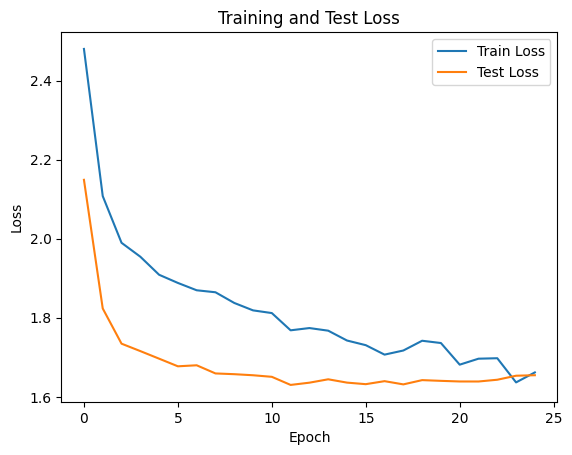

Метрики для ВБП:
Accuracy: 0.681592039800995
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Метрики для КЗ:
Accuracy: 0.8557213930348259
Precision: 0.86
Recall: 0.9942196531791907
F1-score: 0.9222520107238605

Метрики для Объективный ответ:
Accuracy: 0.7611940298507462
Precision: 0.9090909090909091
Recall: 0.30303030303030304
F1-score: 0.45454545454545453

Метрики для Токсичность 3-4:
Accuracy: 0.9800995024875622


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.0
Recall: 0.0
F1-score: 0.0



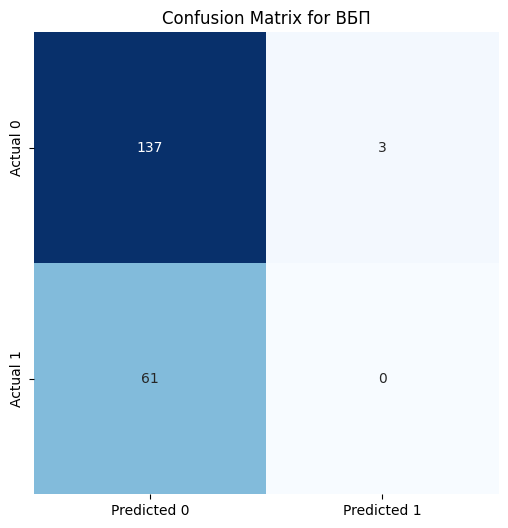

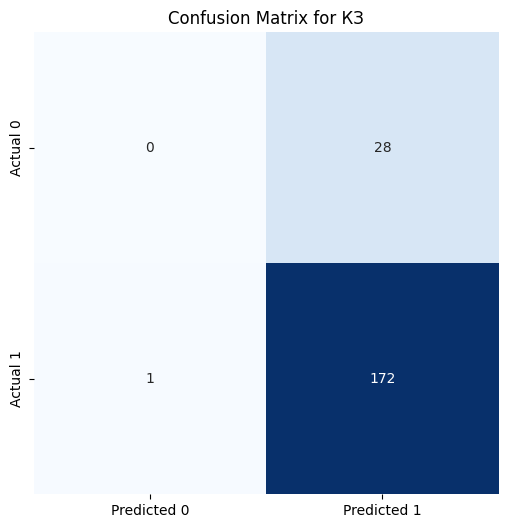

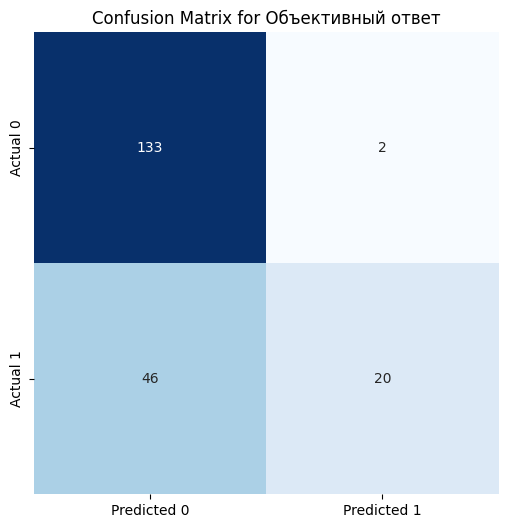

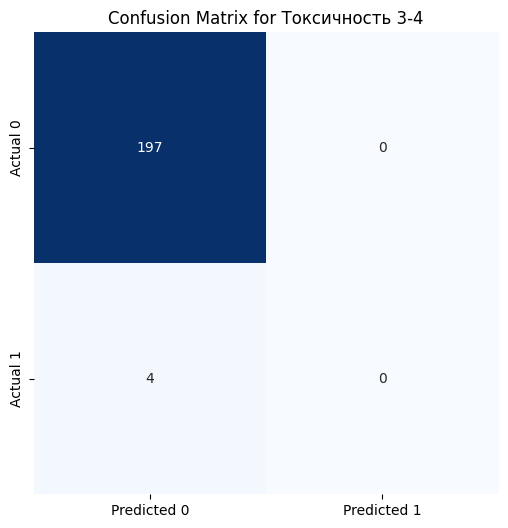

In [280]:
# Визуализация потерь
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Оценка модели
model.eval()
y_pred1, y_pred2, y_pred3, y_pred4 = [], [], [], []
y_true1, y_true2, y_true3, y_true4 = [], [], [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        output1, output2, output3, output4 = model(inputs)

        # Преобразуем выходы в бинарные значения
        y_pred1.extend((output1 > 0.5).int().tolist())
        y_pred2.extend((output2 > 0.5).int().tolist())
        y_pred3.extend((output3 > 0.5).int().tolist())
        y_pred4.extend((output4 > 0.5).int().tolist())

        # Сохраняем истинные значения
        y_true1.extend(labels[:, 0].int().tolist())
        y_true2.extend(labels[:, 1].int().tolist())
        y_true3.extend(labels[:, 2].int().tolist())
        y_true4.extend(labels[:, 3].int().tolist())

# Метрики для каждого таргета
def print_metrics(y_true, y_pred, target_name):
    print(f"Метрики для {target_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print()

print_metrics(y_true1, y_pred1, "ВБП")
print_metrics(y_true2, y_pred2, "КЗ")
print_metrics(y_true3, y_pred3, "Объективный ответ")
print_metrics(y_true4, y_pred4, "Токсичность 3-4")

# Матрицы ошибок
def plot_confusion_matrix(y_true, y_pred, target_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {target_name}')
    plt.show()

plot_confusion_matrix(y_true1, y_pred1, "ВБП")
plot_confusion_matrix(y_true2, y_pred2, "КЗ")
plot_confusion_matrix(y_true3, y_pred3, "Объективный ответ")
plot_confusion_matrix(y_true4, y_pred4, "Токсичность 3-4")

Explaining model for target: Прогрессирование


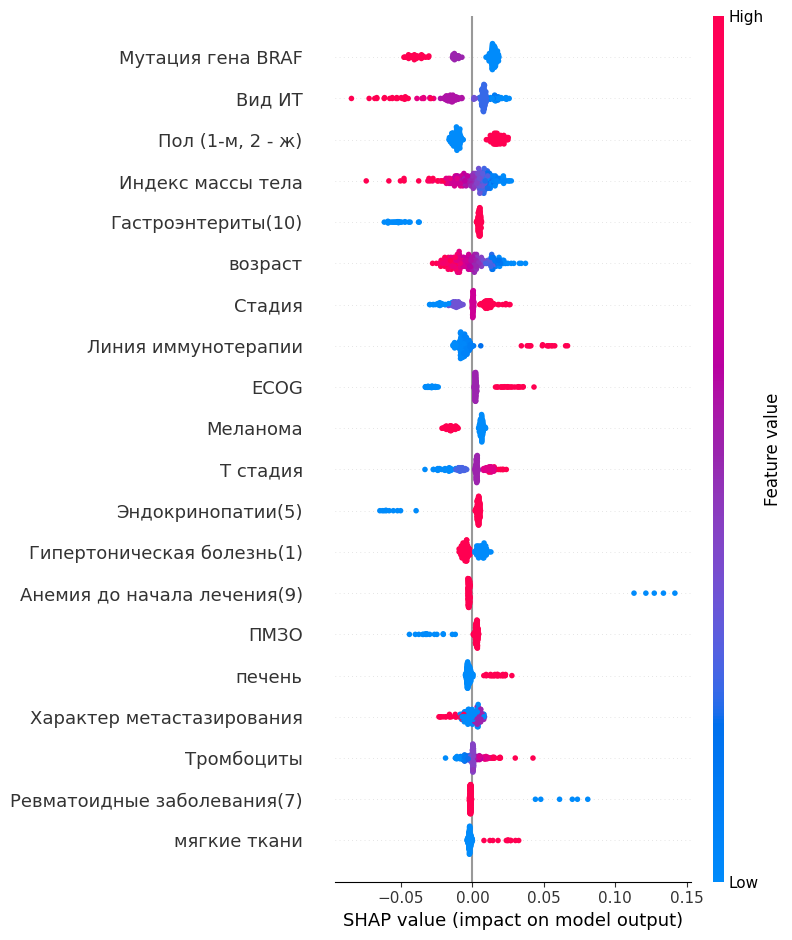

Explaining model for target: Контроль


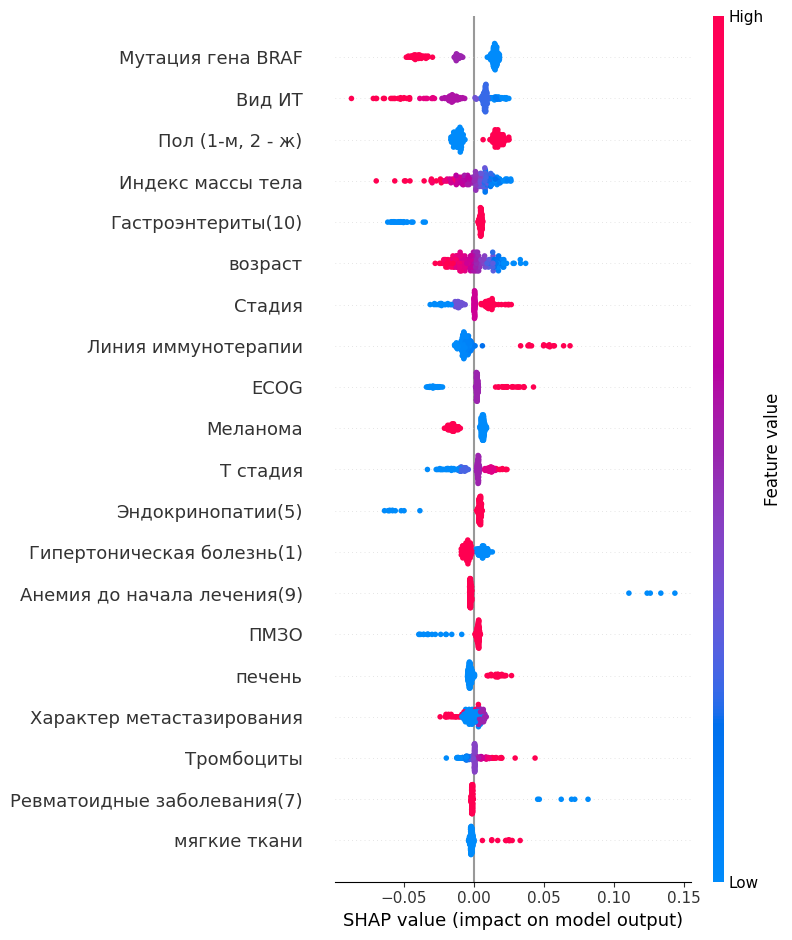

Explaining model for target: Ответ


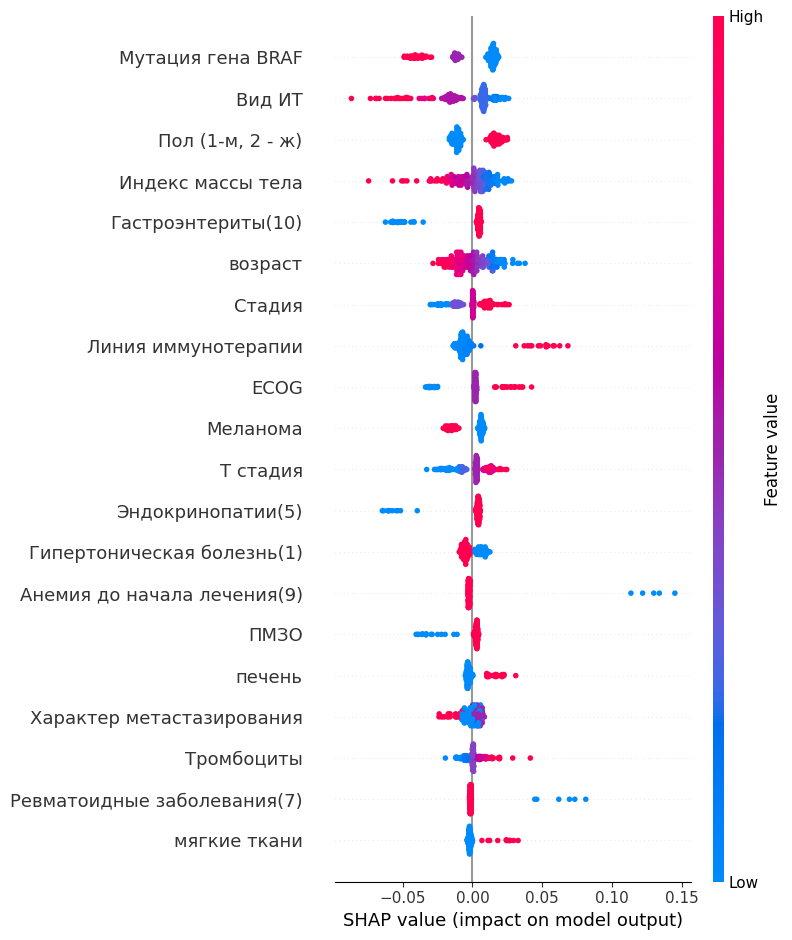

Explaining model for target: Токсичность


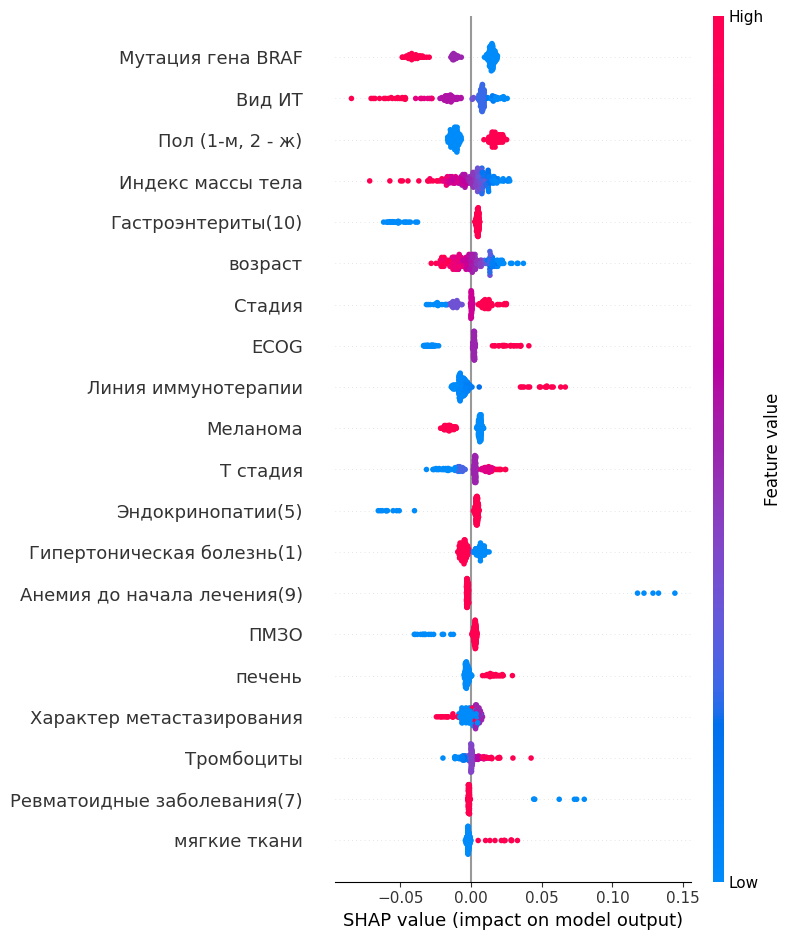

In [309]:
# создаем модель для одного таргета (например, "Прогрессирование")
class SingleTaskModel(nn.Module):
    def __init__(self, input_size):
        super(SingleTaskModel, self).__init__()
        # общий скрытый слой
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)

        # выходной слой для одного таргета
        self.output = nn.Linear(32, 1)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)

        # выход для одного таргета
        out = self.sigmoid(self.output(x))
        return out

# инициализация модели для одного таргета
single_task_model = SingleTaskModel(input_size)

# загружаем веса из многозадачной модели (для первого таргета)
single_task_model.fc1.load_state_dict(model.fc1.state_dict())
single_task_model.fc2.load_state_dict(model.fc2.state_dict())
single_task_model.output.load_state_dict(model.output1.state_dict())

# переводим модель в режим оценки
single_task_model.eval()

import shap

def model_predict(data, specific_model):
    specific_model.eval()
    with torch.no_grad():
        return specific_model(torch.tensor(data, dtype=torch.float32)).numpy()


for i, target in enumerate(y_test):
    print(f"Explaining model for target: {target}")

    specific_model = single_task_model
    explainer = shap.Explainer(lambda data: model_predict(data, specific_model), X_train.values)

    shap_values = explainer(X_test.values)

    # Визуализация SHAP для текущей модели
    shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns)


In [295]:
X_train_tensor.shape

torch.Size([800, 44])

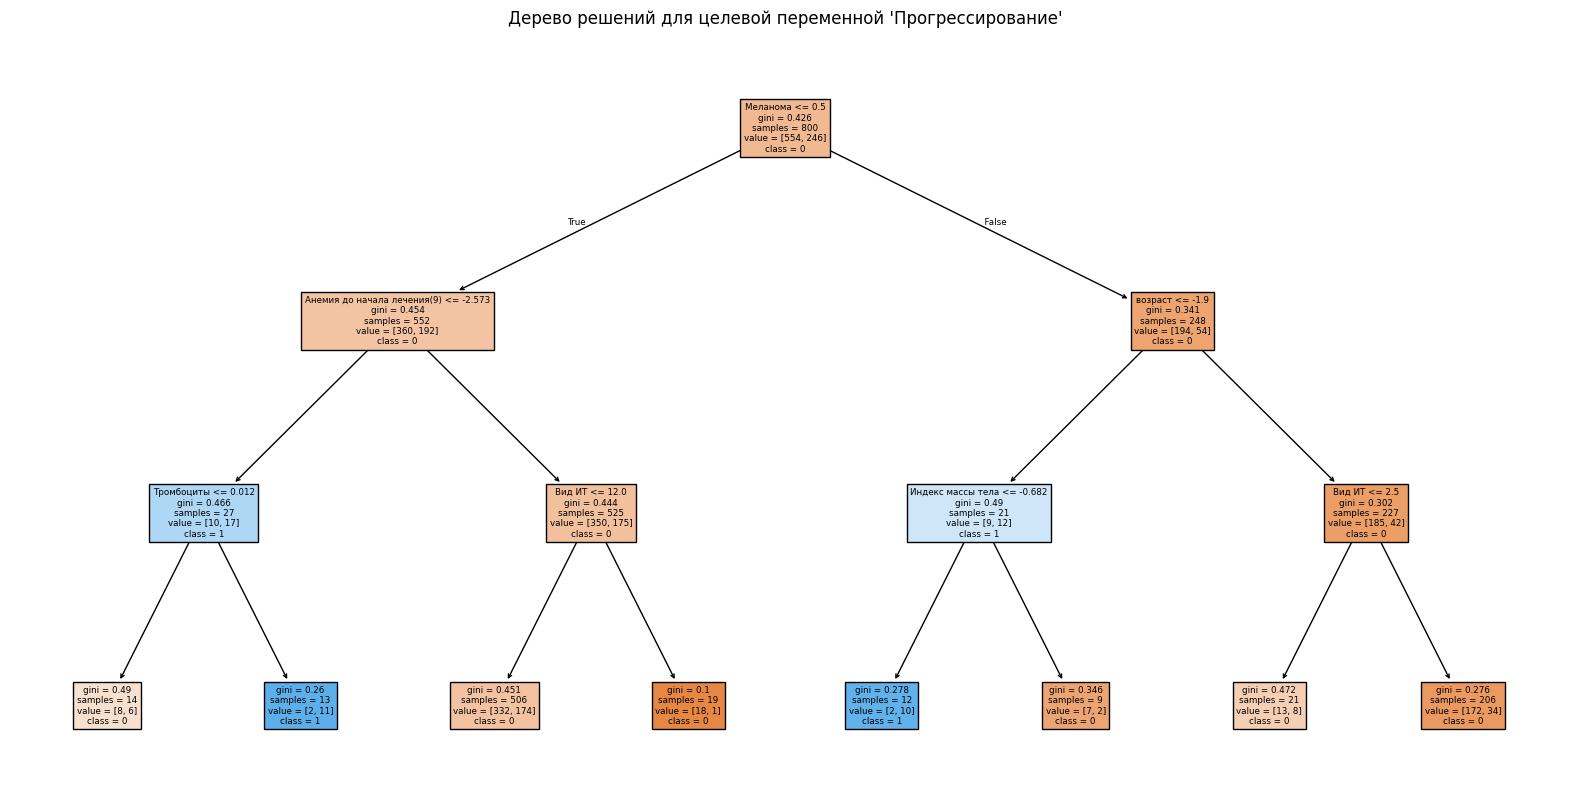

In [288]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# создаем модель дерева решений для одного таргета (например, "прогрессирование")
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train['Прогрессирование'])

# визуализация дерева решений
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.title("Дерево решений для целевой переменной 'Прогрессирование'")
plt.show()

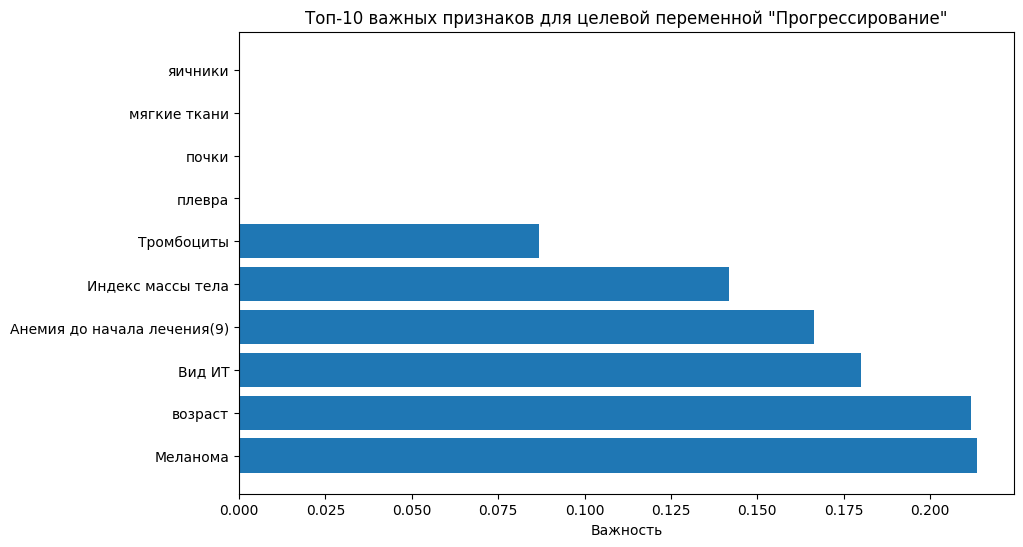

In [289]:
# важность признаков
feature_importances = dt_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Важность')
plt.title('Топ-10 важных признаков для целевой переменной "Прогрессирование"')
plt.show()

In [290]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# предсказания на тестовой выборке
y_pred_dt = dt_model.predict(X_test)

# метрики для дерева решений
print("Метрики для дерева решений (Прогрессирование):")
print("Accuracy:", accuracy_score(y_test['Прогрессирование'], y_pred_dt))
print("Precision:", precision_score(y_test['Прогрессирование'], y_pred_dt))
print("Recall:", recall_score(y_test['Прогрессирование'], y_pred_dt))
print("F1-score:", f1_score(y_test['Прогрессирование'], y_pred_dt))

Метрики для дерева решений (Прогрессирование):
Accuracy: 0.6865671641791045
Precision: 0.25
Recall: 0.01639344262295082
F1-score: 0.03076923076923077


In [291]:
print("Метрики для нейронной сети (Прогрессирование):")
print("Accuracy:", accuracy_score(y_true1, y_pred1))
print("Precision:", precision_score(y_true1, y_pred1))
print("Recall:", recall_score(y_true1, y_pred1))
print("F1-score:", f1_score(y_true1, y_pred1))

Метрики для нейронной сети (Прогрессирование):
Accuracy: 0.681592039800995
Precision: 0.0
Recall: 0.0
F1-score: 0.0
